# Regressão Logística, KNN e SVM
dataset: iris

### Importação de Bibliotecas

In [ ]:
# Importação das bibliotecas e métodos necessários
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
 
# Bibliotecas específicas de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

### Importação do Dataset

In [ ]:
df = pd.read_csv('/content/drive/My Drive/MBA/MÓDULO - FUNDAMENTOS/WILSON/Métodos não probabilísticos - Regressão Linear/Datasets/myiris.csv')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Análise Descritiva

In [ ]:
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
print("Nomes das espécies: \n",df.Species.unique())
print("Nomes das espécies: \n",df.Species.value_counts())

Nomes das espécies: 
 ['setosa' 'versicolor' 'virginica']
Nomes das espécies: 
 versicolor    50
virginica     50
setosa        50
Name: Species, dtype: int64


### Gráfico "Manual"

In [ ]:
# Adição de informação de cor ao DataFrame
df['Cor'] = 'red'                                       # Para espécie 'setosa': cor (padrão) = vermelho
df.loc[df['Species'] == 'versicolor','Cor'] = 'green'   # Espécie 'versicolor': cor = verde
df.loc[df['Species'] == 'virginica','Cor'] = 'blue'     # Espécie 'virginica': cor = azul
 
# Exibe as novas informações
print("Novo DataFrame:")
print(df)

Novo DataFrame:
     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species   Cor
0             5.1          3.5           1.4          0.2     setosa   red
1             4.9          3.0           1.4          0.2     setosa   red
2             4.7          3.2           1.3          0.2     setosa   red
3             4.6          3.1           1.5          0.2     setosa   red
4             5.0          3.6           1.4          0.2     setosa   red
..            ...          ...           ...          ...        ...   ...
145           6.7          3.0           5.2          2.3  virginica  blue
146           6.3          2.5           5.0          1.9  virginica  blue
147           6.5          3.0           5.2          2.0  virginica  blue
148           6.2          3.4           5.4          2.3  virginica  blue
149           5.9          3.0           5.1          1.8  virginica  blue

[150 rows x 6 columns]


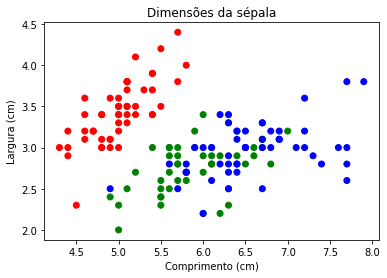

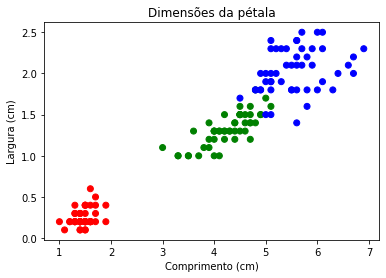

In [ ]:
# Representação gráfica
# Diagrama de dispersão entre comprimento e largura da sépala
plt.scatter(df['Sepal.Length'],df['Sepal.Width'],color = df['Cor'])
plt.title("Dimensões da sépala")
plt.xlabel("Comprimento (cm)")
plt.ylabel("Largura (cm)")
plt.show()    # "Consolida" a exibição do gráfico
 
# Diagrama de dispersão entre comprimento e largura da pétala
print("\n")   # Pula uma linha
plt.scatter(df['Petal.Length'],df['Petal.Width'],color = df['Cor'])
plt.title("Dimensões da pétala")
plt.xlabel("Comprimento (cm)")
plt.ylabel("Largura (cm)")
plt.show()    # "Consolida" a exibição do gráfico

### Selecionar de dados dos atriutos (variáveis independentes 'x') e dos rótulos-labels (variável dependentes 'y')

In [ ]:
X = df[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']]
y = df['Species']

print("Dimensões de X: ", X.shape)
print("Dimensões de y: ", y.shape)

Dimensões de X:  (150, 4)
Dimensões de y:  (150,)


### Treinamento de um Modelo de Classificação (Regressão Logística)

In [ ]:
modeloRL.n_iter_ # Verificar quantas interações é necessárias para que o modelo venha convergir, pois Regressão Logística é um modelo interativo, portanto precisamos alterar algumas coisas

array([89], dtype=int32)

In [ ]:
modeloRL = LogisticRegression(C=10000) # como padrão o C=1, isso dá um erro, portanto aumentar a força de regularização
modeloRL.fit(X,y)

LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Avaliação da qualidade do modelo de regressão logística
# Calcula as previsões usando os dados de treino (= todos os dados disponíveis)
y_prevRL = modeloRL.predict(X)
 
# Matriz de confusão
print("Matriz de confusão:\n",confusion_matrix(y,y_prevRL))
 
# Relatório das métricas de qualidade
print(classification_report(y_true = y,y_pred = y_prevRL,digits = 4))

Matriz de confusão:
 [[50  0  0]
 [ 0 49  1]
 [ 0  1 49]]
              precision    recall  f1-score   support

      setosa     1.0000    1.0000    1.0000        50
  versicolor     0.9800    0.9800    0.9800        50
   virginica     0.9800    0.9800    0.9800        50

    accuracy                         0.9867       150
   macro avg     0.9867    0.9867    0.9867       150
weighted avg     0.9867    0.9867    0.9867       150



### Treinamento de um Modelo KNN

In [ ]:
from sklearn.preprocessing import StandardScaler

escalador = StandardScaler() # Instância
escalador.fit(X)

#Padronização, mudar eles de escala para que o conjunto de dados tenha média=0 e desvio padrão=1
X_Norm = escalador.transform(X)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

modeloKNN = KNeighborsClassifier(n_neighbors =1) #n_neighbors é para quantos vizinhos mais próximos irei classificar
modeloKNN.fit(X_Norm,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
# Avaliação da qualidade do modelo de regressão logística
# Calcula as previsões usando os dados de treino (= todos os dados disponíveis)
y_prevKNN = modeloKNN.predict(X_Norm)
 
# Matriz de confusão
print("Matriz de confusão:\n",confusion_matrix(y,y_prevKNN))
 
# Relatório das métricas de qualidade
print(classification_report(y_true = y,y_pred = y_prevKNN,digits = 4))

Matriz de confusão:
 [[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]
              precision    recall  f1-score   support

      setosa     1.0000    1.0000    1.0000        50
  versicolor     1.0000    1.0000    1.0000        50
   virginica     1.0000    1.0000    1.0000        50

    accuracy                         1.0000       150
   macro avg     1.0000    1.0000    1.0000       150
weighted avg     1.0000    1.0000    1.0000       150



### Treinamento de um Modelo SVM 

In [ ]:
from sklearn.svm import SVC
 
modeloSVM = SVC()   # Cria instância de objeto "classificador"
modeloSVM.fit(X,y)  # Treina o modelo com os dados disponíveis
 
# Avaliação da qualidade do classificador SVM
# Calcula as previsões usando os dados de treino (= todos os dados disponíveis)
y_prevSVM = modeloSVM.predict(X)
 
# Matriz de confusão
print("Matriz de confusão:\n",confusion_matrix(y_true = y,y_pred = y_prevSVM))
 
# Relatório das métricas de qualidade
print(classification_report(y_true = y,y_pred = y_prevSVM,digits = 4))

Matriz de confusão:
 [[50  0  0]
 [ 0 48  2]
 [ 0  2 48]]
              precision    recall  f1-score   support

      setosa     1.0000    1.0000    1.0000        50
  versicolor     0.9600    0.9600    0.9600        50
   virginica     0.9600    0.9600    0.9600        50

    accuracy                         0.9733       150
   macro avg     0.9733    0.9733    0.9733       150
weighted avg     0.9733    0.9733    0.9733       150

